# Find the number of insaturations in molecule

Unsaturation is an important concept in chemistry. The degree of unsaturation is influenced by double bonds triple bonds and cycles in a molecule.

In [29]:
#Let's start by importing the function
from explosivity_and_unsaturations import insat

#Let's also draw those molecules to visualize the unsaturations
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.molSize = 300,300

Let's test if it is able to find the different strucutures that influence the degree of unsaturations.

Firstly, double bonds. If I give the smiles "C=CCC" it should give back 1, because we have one double bond:

The degree of insaturation is 1.0.


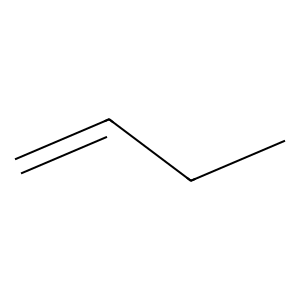

In [25]:
print(insat("C=CCC"))
butandiene = Chem.MolFromSmiles("C=CCC")
butandiene

If we now test the molecule with smiles "CCC#CCC", it should give back 2. We have only one triple bond, but they count 2 in the degree of unsaturation.

The degree of insaturation is 2.0.


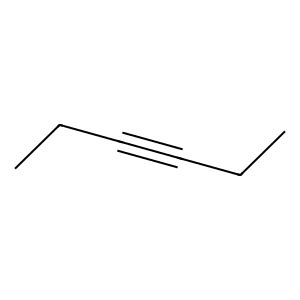

In [26]:
print(insat("CCC#CCC"))
hexine = Chem.MolFromSmiles("CCC#CCC")
hexine

The last structure we need to test is the cycle, if I give the smiles "C1CCCC1", the function should give back 1.0

The degree of insaturation is 1.0.


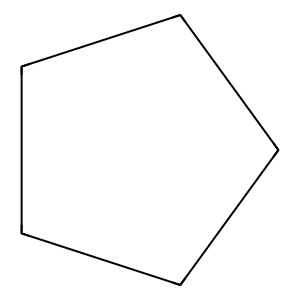

In [27]:
print(insat("C1CCCC1"))
cyclopentane = Chem.MolFromSmiles("C1CCCC1")
cyclopentane

Generally, the concept of unsaturations is only counted if one one of the atoms is a carbon. For example, in the most common used definition of degreee of unsaturation, a molecule like sulfruric acid, H2SO4, would have a degree of unsaturation of 0, event though it contains two double bonds. In this function, the concept of degree of unsaturation was generalized including these kind of cases too.

The degree of insaturation is 2.0.


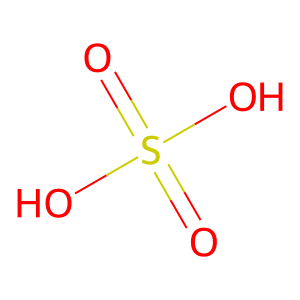

In [28]:
print(insat("OS(=O)(=O)O"))
sulfuric_acid= Chem.MolFromSmiles("OS(=O)(=O)O")
sulfuric_acid

# How can this be of any use?

The degree of unsaturation is useful in molecule analysis. For example when looking for the structure of a molecule analyzed via spectrometry (mass, infrared, HNMR, ...). Knowing the degree of unsaturation tells you if the molecule has double and triple bonds or cycles in its structure.

# What does this function do exactly?

The formula classically used only includes carbon, hydrogens, nitrogen and the halogens. The generalized formula we implemented can be used for any molecule. The formula is the following: 

$$
\displaystyle\frac{6*val8 + 5*val7 + 4*val6 + 3*val5 + 2*val4 + val3 - val1 - 2*val0 + 2}{2}
$$

Where valx indicates the number of atoms that have valence x. The contribution of each atoms only depend on their valence.